In [1]:
#get all the datasets aligned together......
import datetime
import netCDF4 as nc
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cftime
import pathlib

In [2]:
#CESM2 370 is the incomplete one 
dills=['MPISSP370.pkl','MPISSP126.pkl','MPIhist.pkl','CEDM2ssp126.pkl','CEDM2ssp370.pkl','CEDM2hist.pkl','CM4C192_future.pkl','CM4C192_hist.pkl']
#pd.read_pickle('MPISSP370.pkl')
namedills=['MPISSP370','MPISSP126','MPIhist','CESM2ssp126','CESM2ssp370','CESM2hist','CM4C192_future','CM4C192_hist','obs']

In [3]:
MPISSP370=pd.read_pickle(dills[0])
MPISSP126=pd.read_pickle(dills[1])
MPIhist=pd.read_pickle(dills[2])
CESM2ssp126=pd.read_pickle(dills[3])
CESM2ssp370=pd.read_pickle(dills[4])
CESM2hist=pd.read_pickle(dills[5])
CM4C192_future=pd.read_pickle(dills[6])
CM4C192_hist=pd.read_pickle(dills[7])

In [4]:
#load in the observational data to compare....
#new excel sheet here 
cp_data = pd.read_excel('final_ida_analysis_data.xlsx',sheet_name= "History-present")
Years = cp_data["Year"]
AMWSR   = cp_data["NEW Annual Maximum Warm Season Hourly Rainfall (inches/hour)"]
CDD_degC = cp_data['Warm Season Historical obs CDD (dec C)']
avt = cp_data['Warm Season Average Temperature (C)']

Text(0.5, 1.0, 'CDD (C)')

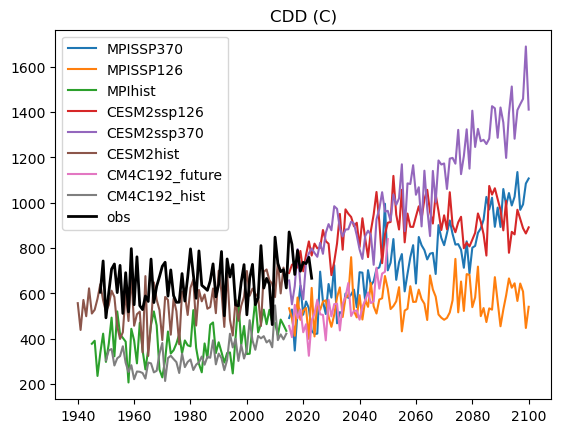

In [5]:
fig, axs = plt.subplots()
for p in range(len(dills)):
    df=pd.read_pickle(dills[p])
    plt.plot(df.index,df['cdd(f)']*(5/9))
plt.plot(Years,CDD_degC,color='k',linewidth=2)
plt.legend(namedills)

plt.title('CDD (C)')

Text(0.5, 1.0, 'Average Temperature')

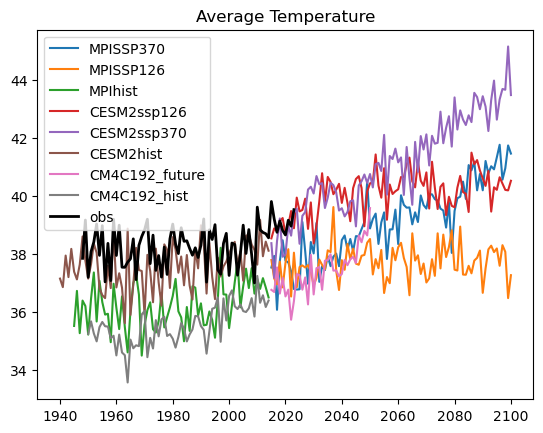

In [6]:
fig, axs = plt.subplots()
for p in range(len(dills)):
    df=pd.read_pickle(dills[p])
    plt.plot(df.index,df['avgt(f)']*(5/9))
plt.plot(Years,avt,color='k',linewidth=2)
plt.legend(namedills)

plt.title('Average Temperature')

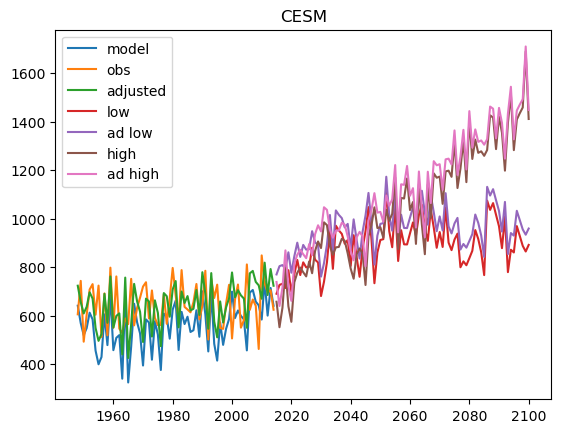

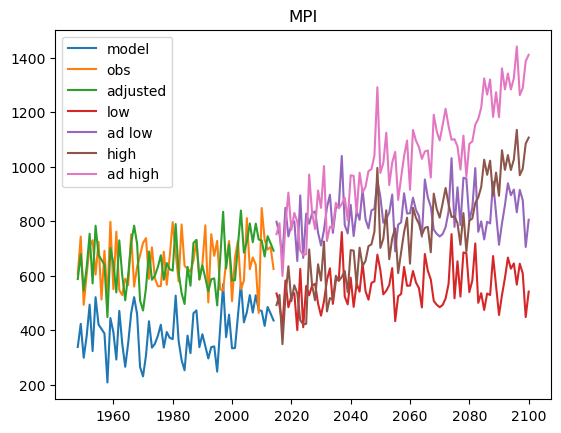

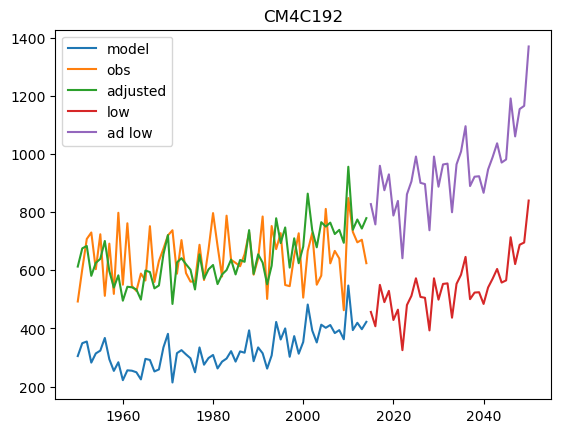

In [7]:
#CDD CDD CDD

#for each set of models
#CESM2-3:6    1
#MPI- 1:3     2 
#CM4- 6:8???/ 3
odf=pd.DataFrame(data={'obsCDD_degC':CDD_degC,'obsavt':avt})
odf=odf.set_index(Years)
ugh=['CESM','MPI','CM4C192']
#odf
#obs=CDD_degC

# MPISSP370=pd.read_pickle(dills[0])
# MPISSP126=pd.read_pickle(dills[1])
# MPIhist=pd.read_pickle(dills[2])
# CESM2ssp126=pd.read_pickle(dills[3])
# CESM2ssp370=pd.read_pickle(dills[4])
# CESM2hist=pd.read_pickle(dills[5])
# CM4C192_future=pd.read_pickle(dills[6])
# CM4C192_hist=pd.read_pickle(dills[7])

#this for CDD
for m in range(3):
    var='cdd(f)'
    #do this to the historical one
    if m==0:
        mmodel=CESM2hist
        mmodel['cdd(c)']=mmodel[var]*(5/9)
        flow=CESM2ssp126
        fhigh=CESM2ssp370
    if m==1:
        mmodel=MPIhist
        mmodel['cdd(c)']=mmodel[var]*(5/9)
        flow=MPISSP126
        fhigh=MPISSP370
    if m==2:
        mmodel=CM4C192_hist
        mmodel['cdd(c)']=mmodel[var]*(5/9)
        flow=CM4C192_future
        #high=array(np.nan
    aligned=odf.join(mmodel,how='inner')
    model=aligned['cdd(c)']
    obs=aligned['obsCDD_degC']
    
    mm=np.nanmean(model)
    #ylist=mm.index()
    om=np.nanmean(obs)
    
    ms=np.std(model)
    os=np.std(obs)

    #MUST MAKE SURE YEARS OVERLAP!!! 
    
    diff=np.nanmean(obs)-np.nanmean(model)
    #diff=np.nanmean(obs)-np.nanmean(model)
    
    # model data-mean of model =anomalies of model 
    am=model-mm
    #scale anomalies by the ratio of std (obs/model)
    sa=am*(os/ms)
    # add observed mean 
    ra=sa+om

    #FOR THE FUTURE PROJECTIONS
    low=flow[var]*(5/9)
    high=fhigh[var]*(5/9)
    ra_low=((low-np.nanmean(model))*(np.std(obs)/np.std(model))+np.nanmean(obs))
    ra_high=((high-np.nanmean(model))*(np.std(obs)/np.std(model))+np.nanmean(obs))

    ylist=aligned.index
    fig, axs = plt.subplots()
    plt.plot(ylist,model)
    plt.plot(ylist,obs)
    plt.plot(ylist,ra)
    plt.plot(flow.index,low)
    plt.plot(flow.index,ra_low)
    if m !=2:
        plt.plot(fhigh.index,high)
        plt.plot(fhigh.index,ra_high)
        plt.legend(['model','obs','adjusted','low','ad low','high','ad high'])
        
        #save datframe into a pickle
        d={'low':ra_low,'high':ra_high}
        mm=pd.DataFrame(data=d,index=flow.index)
        #and pickle the dataframe
        #naming convention
        if m ==0:
            mm.to_csv('CESM2cdd.csv')
        if m==1:
            mm.to_csv('MPIcdd.csv')
    else:
        plt.legend(['model','obs','adjusted','low','ad low'])
        d={'low':ra_low}
        mm=pd.DataFrame(data=d,index=flow.index)
        mm.to_csv('CM4C192cdd.csv')
    plt.title(str(ugh[m]))

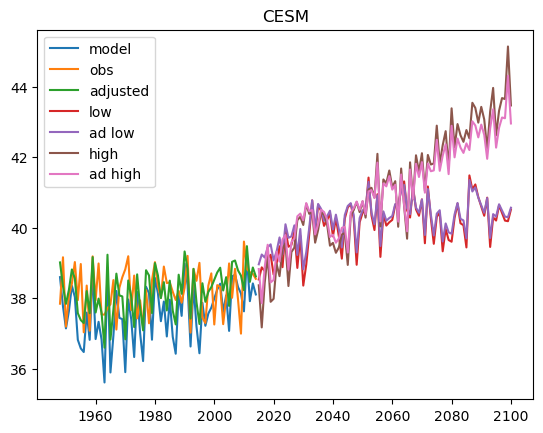

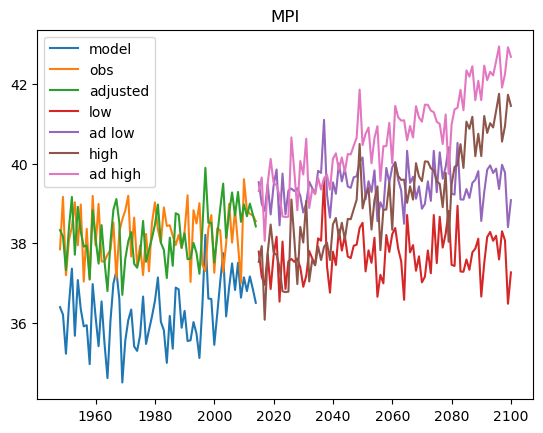

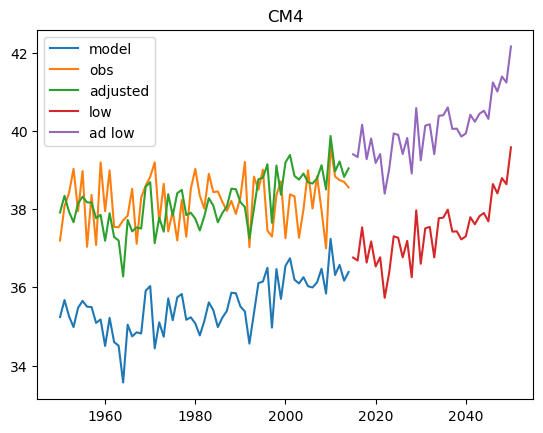

In [8]:
# TEMP TEMP TEMP 
#for each set of models
#CESM2-3:6    1
#MPI- 1:3     2 
#CM4- 6:8???/ 3
odf=pd.DataFrame(data={'obsCDD_degC':CDD_degC,'obsavt':avt})
odf=odf.set_index(Years)
ugh=['CESM','MPI','CM4']
#odf
#obs=CDD_degC

# MPISSP370=pd.read_pickle(dills[0])
# MPISSP126=pd.read_pickle(dills[1])
# MPIhist=pd.read_pickle(dills[2])
# CESM2ssp126=pd.read_pickle(dills[3])
# CESM2ssp370=pd.read_pickle(dills[4])
# CESM2hist=pd.read_pickle(dills[5])
# CM4C192_future=pd.read_pickle(dills[6])
# CM4C192_hist=pd.read_pickle(dills[7])

#this for AVERAGE TEMPERATURE
for m in range(3):
    var='avgt(f)'
    #do this to the historical one
    if m==0:
        mmodel=CESM2hist
        mmodel['t(c)']=mmodel[var]*(5/9)
        flow=CESM2ssp126
        fhigh=CESM2ssp370
    if m==1:
        mmodel=MPIhist
        mmodel['t(c)']=mmodel[var]*(5/9)
        flow=MPISSP126
        fhigh=MPISSP370
    if m==2:
        mmodel=CM4C192_hist
        mmodel['t(c)']=mmodel[var]*(5/9)
        flow=CM4C192_future
        #fhigh=np.empty(len(flow))*np.nan
    aligned=odf.join(mmodel,how='inner')
    model=aligned['t(c)']
    obs=aligned['obsavt']
    
    mm=np.nanmean(model)
    #ylist=mm.index()
    om=np.nanmean(obs)
    
    ms=np.std(model)
    os=np.std(obs)

    #MUST MAKE SURE YEARS OVERLAP!!! 
    
    diff=np.nanmean(obs)-np.nanmean(model)
    #diff=np.nanmean(obs)-np.nanmean(model)
    
    # model data-mean of model =anomalies of model 
    am=model-mm
    #scale anomalies by the ratio of std (obs/model)
    sa=am*(os/ms)
    # add observed mean 
    ra=sa+om

    #FOR THE FUTURE PROJECTIONS
    low=flow[var]*(5/9)
    
    ra_low=((low-np.nanmean(model))*(np.std(obs)/np.std(model))+np.nanmean(obs))
    if m==2:
        ra_high=np.empty(len(flow))
    else:
        high=fhigh[var]*(5/9)
        ra_high=((high-np.nanmean(model))*(np.std(obs)/np.std(model))+np.nanmean(obs))
    
    ylist=aligned.index
    fig, axs = plt.subplots()
    plt.plot(ylist,model)
    plt.plot(ylist,obs)
    plt.plot(ylist,ra)
    plt.plot(flow.index,low)
    plt.plot(flow.index,ra_low)


    #add saving stuff here
    if m !=2:
        plt.plot(fhigh.index,high)
        plt.plot(fhigh.index,ra_high)
        plt.legend(['model','obs','adjusted','low','ad low','high','ad high'])
        #create dataframe 
        #save dataframe
        #save datframe into a csv
        d={'low':ra_low,'high':ra_high}
        mm=pd.DataFrame(data=d,index=flow.index)
        #and pickle the dataframe
        #naming convention
        if m ==0:
            mm.to_csv('CESM2temp.csv')
        if m==1:
            mm.to_csv('MPItemp.csv')
    else:
        plt.legend(['model','obs','adjusted','low','ad low'])
        d={'low':ra_low}
        mm=pd.DataFrame(data=d,index=flow.index)
        mm.to_csv('CM4C192temp.csv')
    plt.title(str(ugh[m]))

In [100]:
((low-np.nanmean(model))*((np.std(model)))+np.nanmean(obs))

2015    12425.344727
2016     8812.435547
2017     2288.366699
2018    16418.185547
2019     8189.151367
            ...     
2096    15141.913086
2097    21579.210938
2098    18607.548828
2099     5171.376465
2100    12995.600586
Name: cdd(f), Length: 86, dtype: float32

In [88]:
# MPISSP370=pd.read_pickle(dills[0])
# MPISSP126=pd.read_pickle(dills[1])
# MPIhist=pd.read_pickle(dills[2])
# CESM2ssp126=pd.read_pickle(dills[3])
# CESM2ssp370=pd.read_pickle(dills[4])
# CESM2hist=pd.read_pickle(dills[5])
# CM4C192_future=pd.read_pickle(dills[6])
# CM4C192_hist=pd.read_pickle(dills[7])


hmodel=model
low=
high=
ra_low=((low-np.nanmean(hmodel))*(np.std(hmodel)))+np.nanmean(obs)
ra_high=((low-np.nanmean(hmodel))*(np.std(hmodel)))+np.nanmean(obs)


647.3383084577115

In [ ]:
#repeat for temperature 

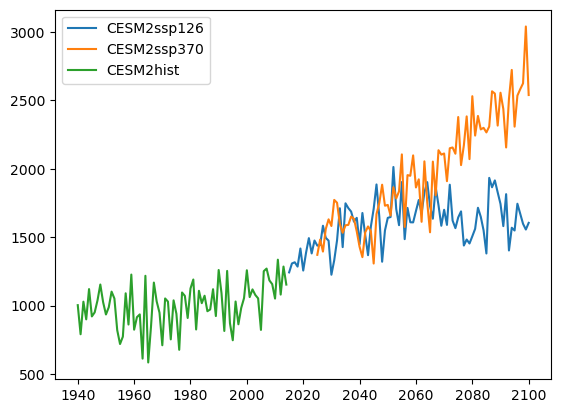

In [45]:
fig, axs = plt.subplots()
for p in range(3,6):
    df=pd.read_pickle(dills[p])
    plt.plot(df.index,df['cdd(f)'])

plt.plot(Years,
plt.legend(namedills[3:6])

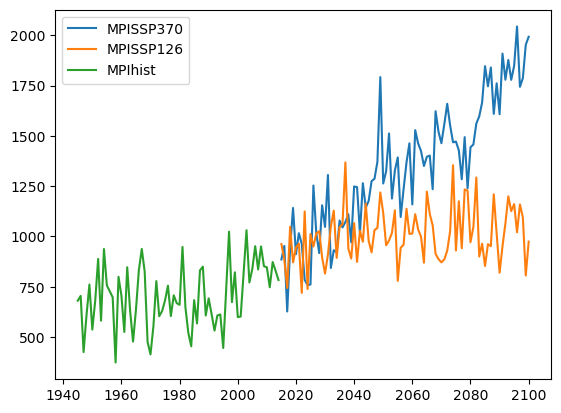

In [46]:
fig, axs = plt.subplots()
for p in range(3):
    df=pd.read_pickle(dills[p])
    plt.plot(df.index,df['cdd(f)'])
plt.legend(namedills)

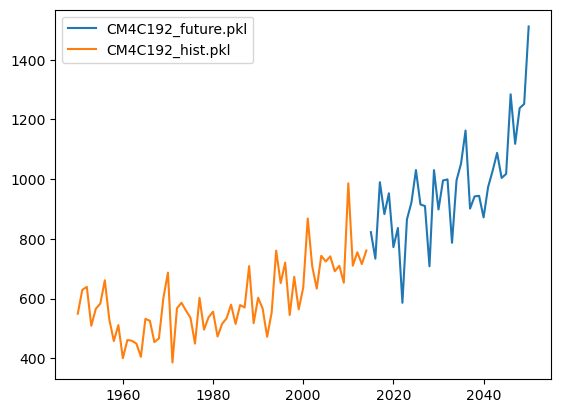

In [47]:
fig, axs = plt.subplots()
for p in range(6 ,8):
    df=pd.read_pickle(dills[p])
    plt.plot(df.index,df['cdd(f)'])
plt.legend(dills[6:8])